# DeepArk Figure 3 Notebook
- This notebook reproduces Figure 3 from the DeepArk manuscript

# Setup
- Import packages and configure some packages

In [1]:
# Stats etc.
import numpy
import pandas

# Viz
import seaborn
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.cbook

# Configure pandas printing.
pandas.options.display.max_rows = 12

/data/home/ecofer/anaconda3/lib/python3.6/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## Configure Plot Appearance

In [2]:
def reset_plot_config():
    seaborn.set()
    matplotlib.rcParams.update(matplotlib.rcParamsDefault)
    matplotlib.rcParams['xtick.major.size'] = 1.5
    matplotlib.rcParams["ytick.major.size"] = 1.5
    matplotlib.rcParams['xtick.minor.size'] = 1
    matplotlib.rcParams["ytick.minor.size"] = 1
    # matplotlib.rcParams['xtick.major.width'] = 1.5
    matplotlib.rcParams['xtick.major.width'] = .8
    matplotlib.rcParams["ytick.major.width"] = .8
    matplotlib.rcParams['xtick.minor.width'] = 0.8
    matplotlib.rcParams["ytick.minor.width"] = .8
    matplotlib.rcParams['xtick.major.pad'] = 1
    matplotlib.rcParams['ytick.major.pad'] = 1

    d = {"lines.linewidth": 0.4,
        "axes.linewidth": 0.4,
        "ytick.major.width": 0.4,
        "ytick.minor.width": 0.4,
        "xtick.major.width": 0.4,
        "xtick.major.size": 3,
        "ytick.major.size": 3,
        "ytick.minor.size": 1.6}

    for k, v in d.items():
        matplotlib.rcParams[k] = v

    matplotlib.rcParams["figure.dpi"] = 300
    matplotlib.rcParams["axes.facecolor"] = "none"
    matplotlib.rcParams["figure.facecolor"] = "none"
    matplotlib.rcParams["xtick.labelsize"] = 6
    matplotlib.rcParams["ytick.labelsize"] = 6
    matplotlib.rcParams["axes.labelsize"] = 6
    matplotlib.rcParams['axes.titlesize'] = 6
    matplotlib.rcParams['legend.fontsize'] = 6
    matplotlib.rcParams['axes.titlepad'] = 4
    matplotlib.rcParams['axes.ymargin'] = 0
    matplotlib.rcParams['axes.xmargin'] = 0
    for x in ["left", "right", "top", "bottom"]:
        matplotlib.rcParams["figure.subplot.{}".format(x)] = 0.08 if x in {"left",  "bottom"} else 0.99

    matplotlib.rcParams["legend.fancybox"] = False



    # Default legend settings:
    d = {"legend.borderpad" : 0.4,  
        "legend.labelspacing" : 0.5,  
        "legend.handlelength" : 2.0,  
        "legend.handleheight" : 0.7,
        "legend.handletextpad" : 0.8,
        "legend.borderaxespad" : 0.5,
        "legend.fontsize": 6,
        "legend.borderpad": 0.4}

    #legend.columnspacing}
    for k, v in d.items():
        matplotlib.rcParams[k] = v


    # Custome legend settings:    
    d = {"legend.borderpad" : 0.4,  
        "legend.labelspacing" : 0.0,  
        "legend.handlelength" : 2.0,  
        "legend.handleheight" : 0.7,
        "legend.handletextpad" : 0.,
        "legend.borderaxespad" : 0.4,
        "legend.fontsize": 6,
        "legend.borderpad": 0.4}

    #legend.columnspacing}
    for k, v in d.items():
        matplotlib.rcParams[k] = v

    #figure.subplot.left   : 0.125  ## the left side of the subplots of the figure

    #figure.subplot.right  : 0.9    ## the right side of the subplots of the figure
    #figure.subplot.bottom : 0.11   ## the bottom of the subplots of the figure
    #figure.subplot.top    : 0.88 
reset_plot_config()


## Load Data

In [3]:
# Read in metadata.
feat_df = pandas.read_csv("../DeepArk/data/drosophila_melanogaster.tsv", sep="\t")
feat_df.drop(["test_auc_roc", "test_auc_prc"], axis=1, inplace=True)

# Ensure proper ordering.
with open("../train/distinct_features.drosophila_melanogaster.txt", "r") as read_file:
    cur_accessions = [x.strip() for x in read_file.readlines()]
feat_df.set_index("accession", inplace=True)
feat_df = feat_df.loc[cur_accessions, :]
print("Finished.")

Finished.


In [4]:
# Read in predicted effects.
orig_df = pandas.read_csv("../T48/T48_preds.csv", sep=",")
dfm = orig_df.copy()
print(orig_df.shape)
display(orig_df)

# Create dataframe with deltas.
d = orig_df.copy()
lhs = d[d.ref != d.alt]
rhs = d[d.ref == d.alt]
rhs = rhs[["accession", "value"]]
rhs.columns = ["accession", "ref_value"]
tmp = lhs.merge(rhs, on="accession")
tmp["delta"] = tmp["value"] - tmp["ref_value"]
tmp.drop(["value", "ref_value"], axis=1, inplace=True)
orig_delta_df = tmp.copy()
display(orig_delta_df)

(6208, 7)


,chrom,pos,ref,alt,full_predicted_allele_minus_strand,accession,value
0,chr3R,26882886,CTT,GTA,CAGGTAC,ERX101804,0.286692
1,chr3R,26882886,CTT,CTA,CAGGTAG,ERX101804,0.321498
2,chr3R,26882886,CTT,CTG,CAGGCAG,ERX101804,0.400053
3,chr3R,26882886,CTT,CTT,CAGGAAG,ERX101804,0.249858
4,chr3R,26882886,CTT,GTA,CAGGTAC,ERX101806,0.064547
...,...,...,...,...,...,...,...
6203,chr3R,26882886,CTT,CTT,CAGGAAG,SRX994749,0.061619
6204,chr3R,26882886,CTT,GTA,CAGGTAC,SRX994750,0.022613
6205,chr3R,26882886,CTT,CTA,CAGGTAG,SRX994750,0.025452
6206,chr3R,26882886,CTT,CTG,CAGGCAG,SRX994750,0.027246


,chrom,pos,ref,alt,full_predicted_allele_minus_strand,accession,delta
0,chr3R,26882886,CTT,GTA,CAGGTAC,ERX101804,0.036834
1,chr3R,26882886,CTT,CTA,CAGGTAG,ERX101804,0.071640
2,chr3R,26882886,CTT,CTG,CAGGCAG,ERX101804,0.150194
3,chr3R,26882886,CTT,GTA,CAGGTAC,ERX101806,0.008479
4,chr3R,26882886,CTT,CTA,CAGGTAG,ERX101806,0.022792
...,...,...,...,...,...,...,...
4651,chr3R,26882886,CTT,CTA,CAGGTAG,SRX994749,0.019520
4652,chr3R,26882886,CTT,CTG,CAGGCAG,SRX994749,0.020019
4653,chr3R,26882886,CTT,GTA,CAGGTAC,SRX994750,0.004210
4654,chr3R,26882886,CTT,CTA,CAGGTAG,SRX994750,0.007049


- Uncomment the cell below to use your own predictions.

In [5]:
# # Load predictions for the ref and alt alleles
# alt_df = pandas.read_csv("../T48/outputs/T48_mutants.alt_predictions.tsv", sep="\t")
# ref_df = pandas.read_csv("../T48/outputs/T48_mutants.ref_predictions.tsv", sep="\t")
# if "contains_unk" in list(alt_df.columns):
#     alt_df.drop("contains_unk", axis=1, inplace=True)
# if "contains_unk" in list(ref_df.columns):
#     ref_df.drop("contains_unk", axis=1, inplace=True)
# accessions = feat_df.reset_index().sort_values("index", ascending=True)["accession"].tolist()
# alt_df.columns = ["chrom", "pos", "name", "ref", "alt" , "strand", "ref_match"] + accessions
# ref_df.columns = ["chrom", "pos", "name", "ref", "alt" , "strand", "ref_match"] + accessions
# ref_df.drop([1, 2], inplace=True)
# ref_df["alt"] = ref_df.ref

# # Combine the ref and alt info.
# df2 = pandas.concat((alt_df, ref_df), axis=0, sort=False)
# df2["ref"] = df2["ref"].apply(lambda x: x[:3])
# df2["alt"] = df2["alt"].apply(lambda x: x[:3])
# accessions = feat_df.reset_index().sort_values("index", ascending=True)["accession"].tolist()
# df2.columns = ["chrom", "pos", "name", "ref", "alt", "strand", "ref_match"] + accessions
# df2.drop(["name", "ref_match", "strand"], axis=1, inplace=True)
# df2 = df2.melt(id_vars=["chrom", "pos", "ref", "alt"], var_name="accession", value_name="value_new")
# dfm = df2.merge(orig_df, on=["chrom", "pos", "ref", "alt", "accession"], validate="one_to_one")
# fig, ax = plt.subplots(1, 1, figsize=(6/2.54, 5/2.54), facecolor='w', dpi=120)
# ax.scatter(dfm.value, dfm.value_new)
# plt.show()
# # Create the original plot.

## Visualize Variant Effects and Expression Effects of T48 Enhancer Alleles
- To change this to use your reproduced predictions, change from using `tmp["value"]` in line 15 to `tmp["new_value"]`

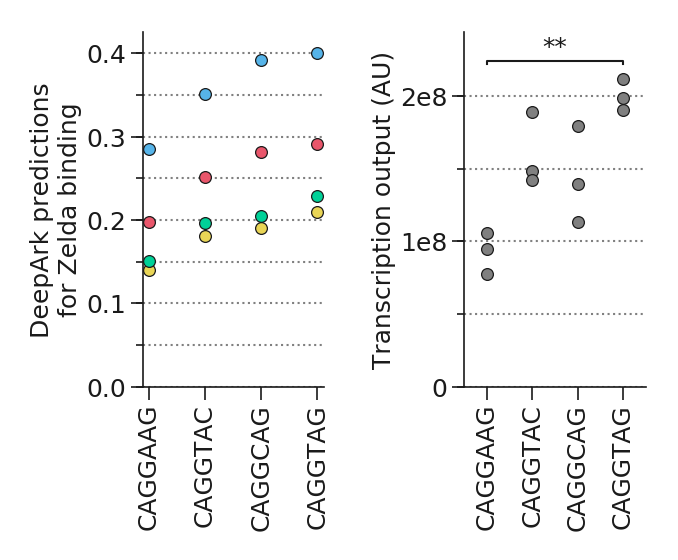

In [6]:
# Constants.
plt_set = ["SRX858991", "SRX858993", "SRX858995", "SRX858997"]
alt_to_label = {"GTA": "CAGGTAC", "CTA": "CAGGTAG", "CTG": "CAGGCAG", "CTT": "CAGGAAG"}
label_to_alt = {v: k for (k, v) in alt_to_label.items()}
allele_order = ["CAGGAAG", "CAGGTAC", "CAGGCAG", "CAGGTAG"]
palette = ["#e9d556", "#00d198","#56b4e9","#e9566b"]

fig, axes = plt.subplots(1, 2, figsize=(6/2.54, 5/2.54), facecolor='w')

# Plot predictions.
ax = axes[0]
for i, x in enumerate(plt_set):
    tmp = dfm[dfm.accession == x].copy()
    for j, allele in enumerate(allele_order):
        ax.scatter(x=[j], y=[tmp["value"][tmp.alt == label_to_alt[allele]].iloc[0]],
                        color=palette[i], edgecolor='k', linewidth=0.3, s=8, alpha=1, zorder=1) 
        # NOTE: If you're making your own predictions & comparing them to the supplement, then use "new_value" here. 
    
# Ticks.
ax.set_xticks([0., 1., 2., 3.], minor=False)
ax.set_xticklabels(allele_order, rotation = 90, ha="center")
ax.set_yticks([0, .05, .1, .15, .2,.25,.3,.35,.4], minor=True)
ax.set_ylim(0, 0.425)
ax.set_yticks([0, .1, .2,.3,.4, ], minor=False)

# Setup axis etc.
ax.set_xlim(ax.get_xlim()[0]-0.1, ax.get_xlim()[1]+0.1)
ax.set_ylabel("DeepArk predictions\nfor Zelda binding", labelpad=1)
ax.set_xlabel("")
for s in ["right", "top"]:
    ax.spines[s].set_visible(False)
for y in ax.get_yticks(minor=True):
    ax.axhline(xmin=0, xmax=4, y=y, linestyle=':', color="grey", linewidth=0.5, zorder=-1)


    
    
# Plot imaging results.
ax = axes[1]
plt_df = pandas.read_csv("../T48/T48_measurements.csv", sep=',')
tmp = plt_df[plt_df.variable == "total_transcriptional_output"].copy()
for allele_i in range(4):
    x = tmp[tmp.full_predicted_allele_minus_strand == allele_order[allele_i]]
    ax.scatter(x=[allele_i+0.5]*x.shape[0], y=x["value"], label=allele_order[allele_i], color='grey', linewidth=0.3, s=8, alpha=1, edgecolor='k')

    
    
# Setup axis and labeling along axis.
ax.set_xlim(0, 4)
ax.set_ylim(0.0, 243933922.1470619)
ax.set_ylabel("Transcription output (AU)", labelpad=1)
ax.set_xlabel("")
for s in ["right", "top"]:
    ax.spines[s].set_visible(False)

# Handle axis ticks.
ax.set_xticks([0.5, 1.5, 2.5, 3.5], minor=False)
ax.set_xticklabels(allele_order, rotation = 90, ha="center")
ax.set_yticks(numpy.array([0, .5, 1, 1.5, 2]) * 1e8, minor=True)
ax.set_yticks(numpy.array([0, 1, 2]) * 1e8, minor=False)
for y in ax.get_yticks(minor=True):
    ax.axhline(xmin=0, xmax=4, y=y, linestyle=':', color="grey", linewidth=0.5, zorder=-1)
ax.set_yticklabels(["0", "1e8", "2e8"])


# Draw significance annotation.
x1 = .5
x2 = 3.5
y1 = tmp.value.max() * 1.05
y2 = tmp.value.max() * 1.06
y3 = y2 + ((y2 - y1) / 2)
ax.plot([x1, x1, x2, x2], [y1, y2,  y2, y1 ],
         color="k", linewidth=0.5)
ax.annotate("**", xy=(numpy.mean([x1, x2]), y3), xycoords="data", ha="center", va="bottom", annotation_clip=False, fontsize=6, clip_on=False)

plt.tight_layout()
plt.show()

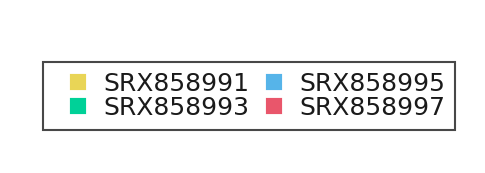

In [7]:
# Matplotlib legend placement is crazy so we just have it in a new plot.
# Setup legend.
fig, ax0 = plt.subplots(1, 1, figsize=(3/2.54, 1/2.54), facecolor='w')
for s in ["right", "top", "left", "bottom"]:
    ax0.spines[s].set_visible(False)
ax0.set_xticks([])
ax0.set_yticks([])
handles = list()
for c, l in zip(palette, plt_set):
    x, = ax0.plot([], marker="s", markersize=3, linestyle="", color=c,  label=l)
    handles.append(x)
legend = ax0.legend(handles=handles, loc="lower left", ncol=2, columnspacing=0, frameon=True)#bbox_to_anchor=(1, -0.05), ncol=4, frameon=True)
legend.get_frame().set_linewidth(0.5)
legend.get_frame().set_edgecolor("k")
plt.show()